In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [139]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [86]:
df = pd.read_csv('pima-indians-diabetes-2.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

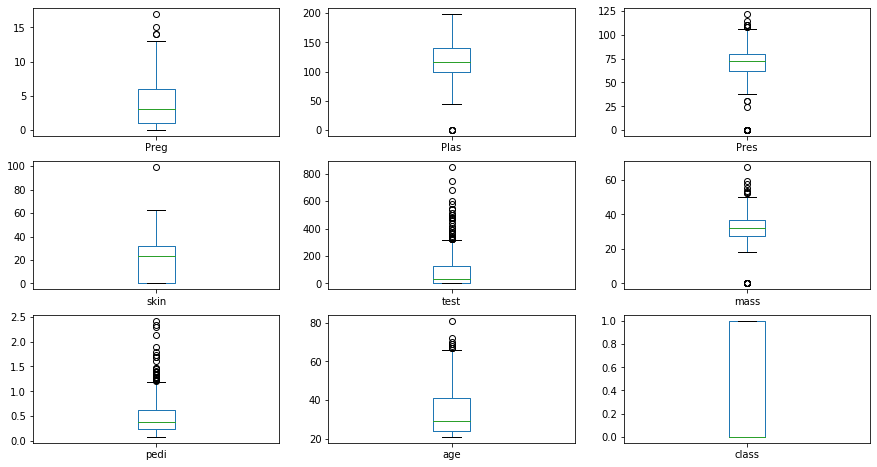

In [90]:
# Handling Outliers
df.plot(kind='box',layout=(3,3),subplots=True)
plt.show()

In [91]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df = df[~((df <(q1-1.5*iqr)) | (df >(q3+1.5*iqr))).any(axis=1)]

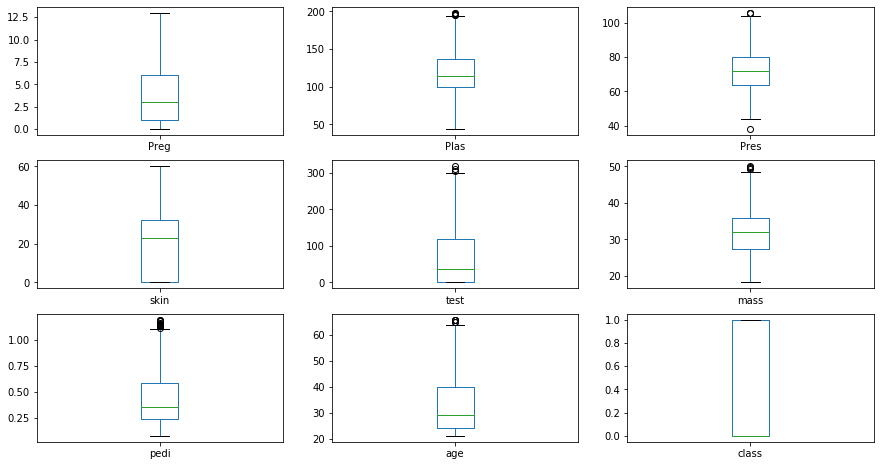

In [92]:
df.plot(kind='box',layout=(3,3),subplots=True)
plt.show()

In [114]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [93]:
df['class'].value_counts()

0    439
1    200
Name: class, dtype: int64

In [94]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [95]:
# Building a Base model
X = df.drop(columns=['class'])
Y = df['class']

In [96]:
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [97]:
X = sm.add_constant(X)

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 9)
(128, 9)
(511,)
(128,)


# Logistic Regression

In [99]:
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.448246
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  511
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            8
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.2906
Time:                        22:01:09   Log-Likelihood:                -229.05
converged:                       True   LL-Null:                       -322.90
Covariance Type:            nonrobust   LLR p-value:                 2.491e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6930      1.078     -8.991      0.000     -11.806      -7.580
Preg           0.0786      0.

In [100]:
y_pred_prob = logreg.predict(X_test)

In [101]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
# print the first five observations of y_pred
y_pred[0:5]

[0, 1, 0, 1, 0]

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        95
           1       0.56      0.55      0.55        33

    accuracy                           0.77       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.77      0.77      0.77       128



In [103]:
confusion_matrix(y_test,y_pred)

array([[81, 14],
       [15, 18]], dtype=int64)

In [104]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):

    y_pred_prob = model.predict(X_test)
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

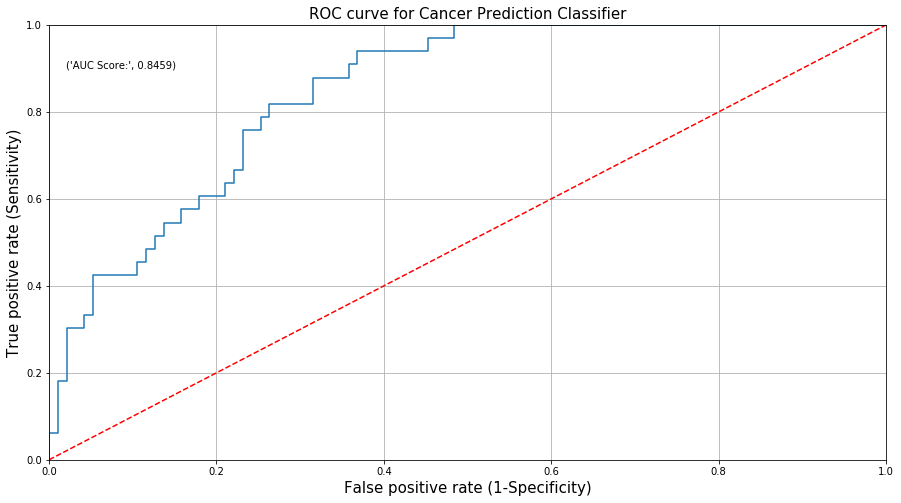

In [105]:
plot_roc(logreg)

In [106]:
# SScaling the data
X.head()

,const,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32
3,1.0,1,89,66,23,94,28.1,0.167,21
5,1.0,5,116,74,0,0,25.6,0.201,30


In [143]:
Xn = df.drop(columns=['class'])
Xn.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_scaled = sc.fit_transform(Xn)
scaled_data = pd.DataFrame(num_scaled, columns = Xn.columns)
scaled_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230


In [145]:
X1 = scaled_data.copy()
X1 = sm.add_constant(X1)

In [146]:
Y.head()

0    1
1    0
2    1
3    0
5    0
Name: class, dtype: int64

In [147]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,Y,test_size=0.2,random_state=10)
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(511, 9)
(128, 9)
(511,)
(128,)


In [148]:
X1.head()

,const,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1.0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,1.0,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.0,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,1.0,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,1.0,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230


In [149]:
logreg1 = sm.Logit(y_train1,X_train1).fit()
print(logreg1.summary())

ValueError: The indices for endog and exog are not aligned

# Naive Bayes

In [245]:
Xnew = df.drop(columns=['class'])
Ynew = df['class']

In [246]:
Xnew.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [248]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(Xnew, Ynew)
y_sm.value_counts()

1    439
0    439
Name: class, dtype: int64

In [249]:
X_sm.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,116,74,0,0,25.6,0.201,30


In [250]:
# Scaling
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(X_sm)

Xnew1 = pd.DataFrame(num_scaled, columns = X_sm.columns)

Xnew1.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,0.620868,0.769928,-0.079486,0.931631,-0.841122,0.168332,0.745989,1.515379
1,-0.935735,-1.305399,-0.626849,0.544975,-0.841122,-0.987836,-0.381746,-0.269018
2,1.243509,1.922887,-0.809303,-1.323866,-0.841122,-1.532887,0.929859,-0.175102
3,-0.935735,-1.173632,-0.626849,0.158318,0.295672,-0.740086,-1.133569,-1.208174
4,0.309548,-0.284206,0.102968,-1.323866,-0.841122,-1.153003,-0.994645,-0.362934


In [251]:
# Splitting
X_trainn,X_testn,y_trainn,y_testn = train_test_split(Xnew1,y_sm,test_size=0.2,random_state=10)
print(X_trainn.shape)
print(X_testn.shape)
print(y_trainn.shape)
print(y_testn.shape)

(702, 8)
(176, 8)
(702,)
(176,)


In [252]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model1 = gnb.fit(X_trainn, y_trainn)

In [253]:
test_pred1 = gnb_model1.predict(X_testn)

In [254]:
print(classification_report(y_testn, test_pred1))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        78
           1       0.80      0.70      0.75        98

    accuracy                           0.74       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.75      0.74      0.74       176



In [255]:
confusion_matrix(y_testn,test_pred1)

array([[61, 17],
       [29, 69]], dtype=int64)

In [256]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc1(model):

    y_pred_prob = model.predict_proba(X_testn)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_testn, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_testn, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

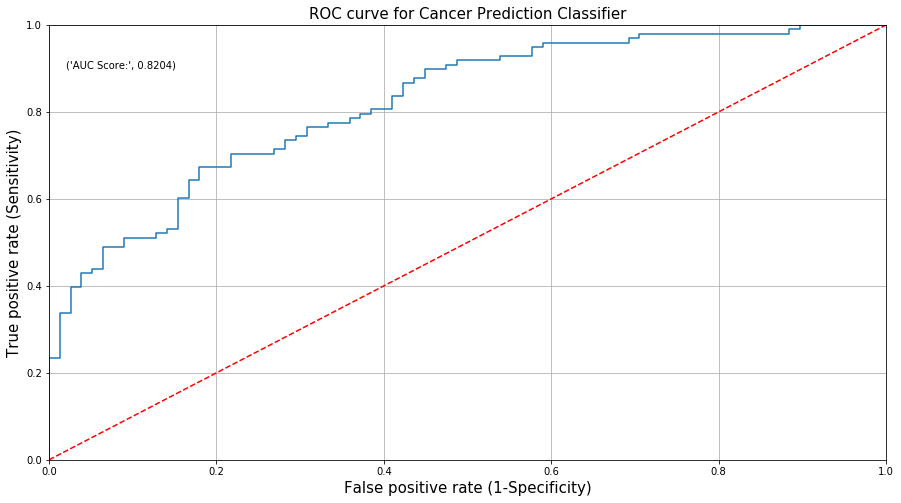

In [257]:
plot_roc1(gnb_model1)

# K-Nearest Neighbor

In [258]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_trainn, y_trainn)

In [259]:
test_pred2 = knn_model.predict(X_testn)

In [260]:
print(classification_report(y_testn,test_pred2))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        78
           1       0.81      0.87      0.84        98

    accuracy                           0.81       176
   macro avg       0.81      0.81      0.81       176
weighted avg       0.81      0.81      0.81       176



In [261]:
confusion_matrix(y_testn,test_pred2)

array([[58, 20],
       [13, 85]], dtype=int64)

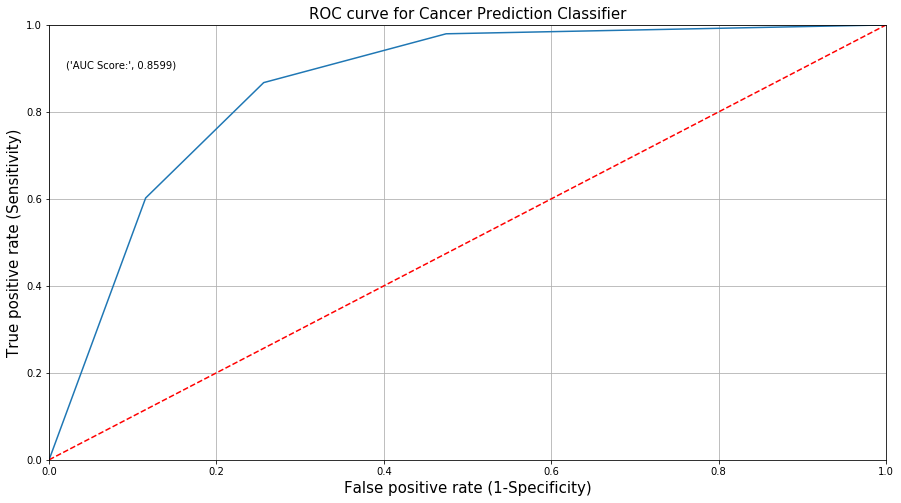

In [262]:
plot_roc1(knn_model)

In [263]:
# Using GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1,5),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_trainn, y_trainn)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFail

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFail

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 1} 



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFail

In [264]:
test_pred3 = knn_grid.predict(X_testn)

In [265]:
print(classification_report(y_testn,test_pred3))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        78
           1       0.80      0.84      0.82        98

    accuracy                           0.80       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.80      0.79       176



In [266]:
confusion_matrix(y_testn,test_pred3)

array([[58, 20],
       [16, 82]], dtype=int64)

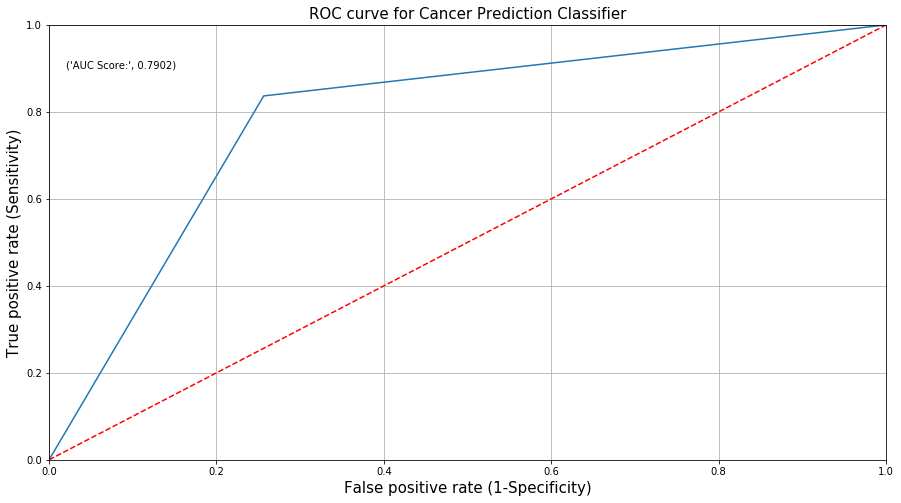

In [267]:
plot_roc1(knn_grid)

# Decision Tree

In [268]:
decision_tree_classification = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_trainn, y_trainn)

[Text(418.5, 380.52, 'X[1] <= 0.984\nentropy = 0.999\nsamples = 702\nvalue = [361, 341]'),
 Text(209.25, 271.8, 'X[5] <= -0.864\nentropy = 0.963\nsamples = 568\nvalue = [348, 220]'),
 Text(104.625, 163.07999999999998, 'X[1] <= -0.597\nentropy = 0.275\nsamples = 127\nvalue = [121, 6]'),
 Text(52.3125, 54.360000000000014, 'entropy = 0.0\nsamples = 65\nvalue = [65, 0]'),
 Text(156.9375, 54.360000000000014, 'entropy = 0.459\nsamples = 62\nvalue = [56, 6]'),
 Text(313.875, 163.07999999999998, 'X[1] <= -0.992\nentropy = 0.999\nsamples = 441\nvalue = [227, 214]'),
 Text(261.5625, 54.360000000000014, 'entropy = 0.49\nsamples = 75\nvalue = [67, 8]'),
 Text(366.1875, 54.360000000000014, 'entropy = 0.989\nsamples = 366\nvalue = [160, 206]'),
 Text(627.75, 271.8, 'X[7] <= 2.22\nentropy = 0.459\nsamples = 134\nvalue = [13, 121]'),
 Text(523.125, 163.07999999999998, 'X[3] <= 1.383\nentropy = 0.345\nsamples = 124\nvalue = [8, 116]'),
 Text(470.8125, 54.360000000000014, 'entropy = 0.285\nsamples = 121

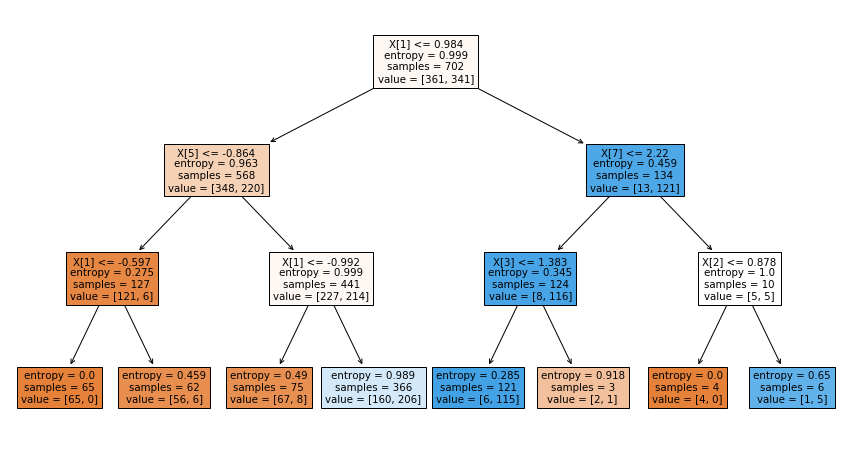

In [269]:
from sklearn import tree
tree.plot_tree(decision_tree,filled=True)

In [270]:
test_pred4 = decision_tree.predict(X_testn)

In [271]:
print(classification_report(y_testn, test_pred4))

              precision    recall  f1-score   support

           0       0.87      0.44      0.58        78
           1       0.68      0.95      0.79        98

    accuracy                           0.72       176
   macro avg       0.78      0.69      0.69       176
weighted avg       0.76      0.72      0.70       176



In [272]:
confusion_matrix(y_testn,test_pred4)

array([[34, 44],
       [ 5, 93]], dtype=int64)

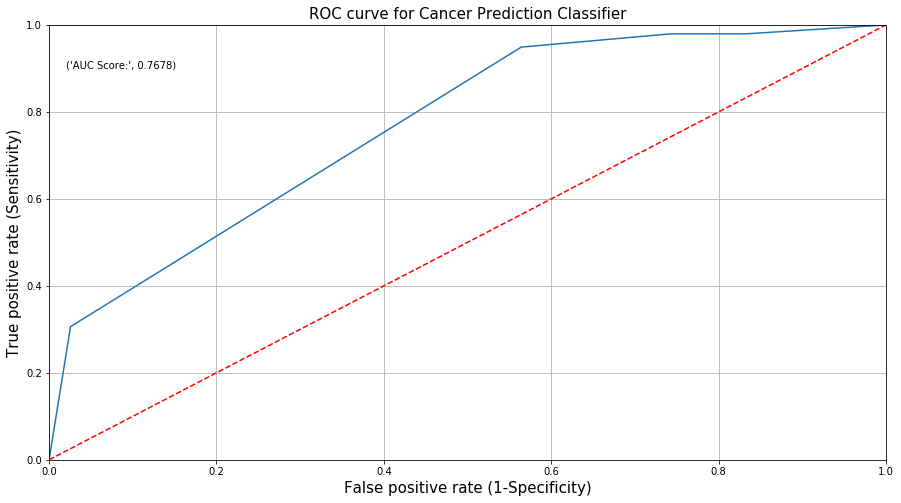

In [273]:
plot_roc1(decision_tree)

In [274]:
# Using GridSearchCV 
# GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,5),
                     'min_samples_split': range(2,5)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_trainn, y_trainn)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')


Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2} 



In [275]:
decision_tree_classification = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy',min_samples_split = 2, random_state = 10)

# fit the model using fit() on train data
decision_tree1 = decision_tree_classification.fit(X_trainn, y_trainn)

[Text(418.49999999999994, 391.392, 'X[1] <= 0.984\nentropy = 0.999\nsamples = 702\nvalue = [361, 341]'),
 Text(184.14, 304.416, 'X[5] <= -0.864\nentropy = 0.963\nsamples = 568\nvalue = [348, 220]'),
 Text(66.96, 217.44, 'X[1] <= -0.597\nentropy = 0.275\nsamples = 127\nvalue = [121, 6]'),
 Text(33.48, 130.464, 'entropy = 0.0\nsamples = 65\nvalue = [65, 0]'),
 Text(100.44, 130.464, 'X[0] <= -0.78\nentropy = 0.459\nsamples = 62\nvalue = [56, 6]'),
 Text(66.96, 43.488, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(133.92, 43.488, 'entropy = 0.592\nsamples = 42\nvalue = [36, 6]'),
 Text(301.32, 217.44, 'X[1] <= -0.992\nentropy = 0.999\nsamples = 441\nvalue = [227, 214]'),
 Text(234.35999999999999, 130.464, 'X[7] <= 1.609\nentropy = 0.49\nsamples = 75\nvalue = [67, 8]'),
 Text(200.88, 43.488, 'entropy = 0.364\nsamples = 72\nvalue = [67, 5]'),
 Text(267.84, 43.488, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(368.28, 130.464, 'X[7] <= -0.504\nentropy = 0.989\nsamples = 366\nv

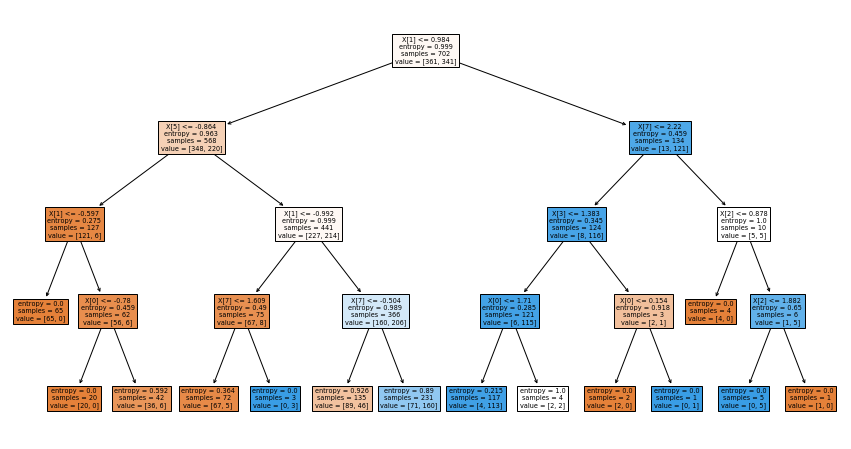

In [276]:
from sklearn import tree
tree.plot_tree(decision_tree1,filled=True)

In [277]:
test_pred5 = decision_tree1.predict(X_testn)

In [278]:
print(classification_report(y_testn,test_pred5))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75        78
           1       0.81      0.77      0.79        98

    accuracy                           0.77       176
   macro avg       0.76      0.77      0.77       176
weighted avg       0.77      0.77      0.77       176



In [279]:
confusion_matrix(y_testn,test_pred5)

array([[60, 18],
       [23, 75]], dtype=int64)

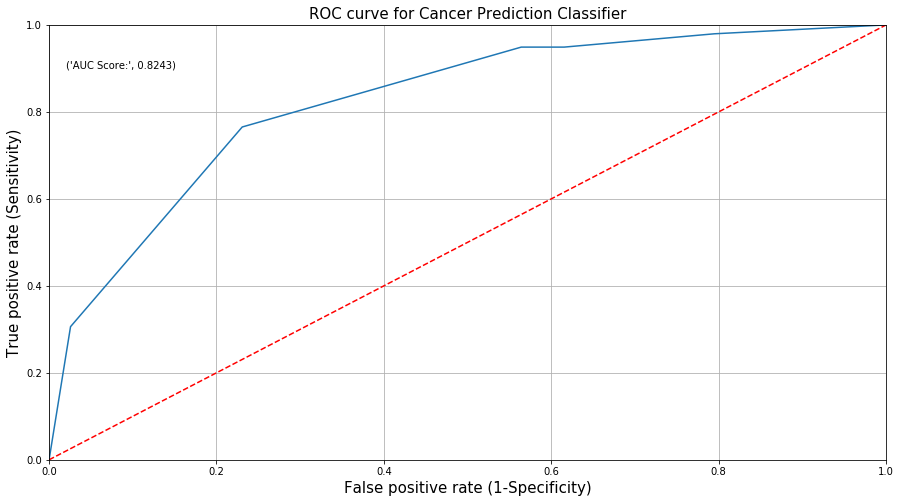

In [280]:
plot_roc1(decision_tree1)

# Random forest

In [311]:
rfc1 = RandomForestClassifier()

# train the model using the x and y training sets
random_forest=rfc1.fit(X_trainn, y_trainn)

In [312]:
test_pred6 = random_forest.predict(X_testn)

In [313]:
print(classification_report(y_testn,test_pred6))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        78
           1       0.83      0.86      0.84        98

    accuracy                           0.82       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.82      0.82      0.82       176



In [284]:
confusion_matrix(y_testn,test_pred6)

array([[60, 18],
       [14, 84]], dtype=int64)

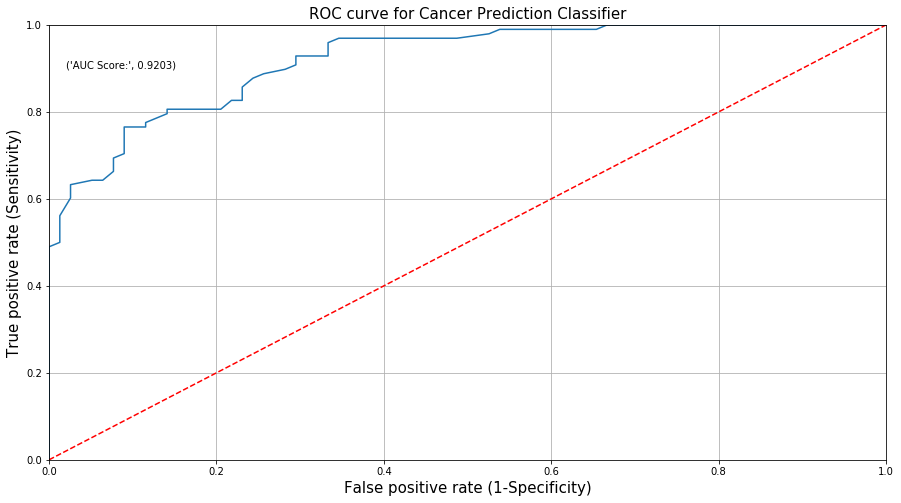

In [285]:
plot_roc1(random_forest)

In [286]:
# Using GridSearchCV
# GridSearchCV
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [30],
                     'max_depth': [5],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2,5],
                     'min_samples_leaf': [2,5],
                     'max_leaf_nodes': [2]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_trainn, y_trainn)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30} 



In [287]:
test_pred7 = rf_grid_model.predict(X_testn)

In [288]:
print(classification_report(y_testn,test_pred7))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68        78
           1       0.74      0.80      0.76        98

    accuracy                           0.73       176
   macro avg       0.73      0.72      0.72       176
weighted avg       0.73      0.73      0.73       176



In [289]:
confusion_matrix(y_testn,test_pred7)

array([[50, 28],
       [20, 78]], dtype=int64)

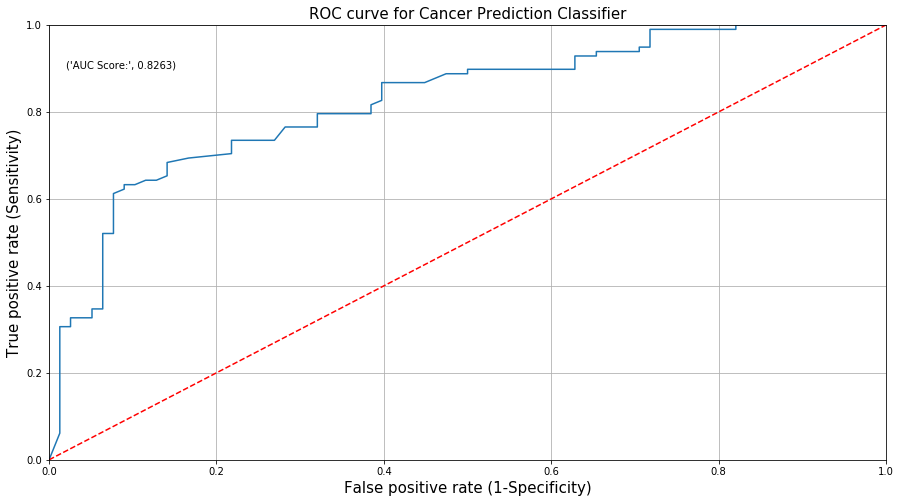

In [290]:
plot_roc1(rf_grid_model)

# Ada Boost

In [291]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_trainn, y_trainn)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [292]:
test_pred8 = ada_model.predict(X_testn)

In [293]:
print(classification_report(y_testn,test_pred8))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77        78
           1       0.82      0.83      0.82        98

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



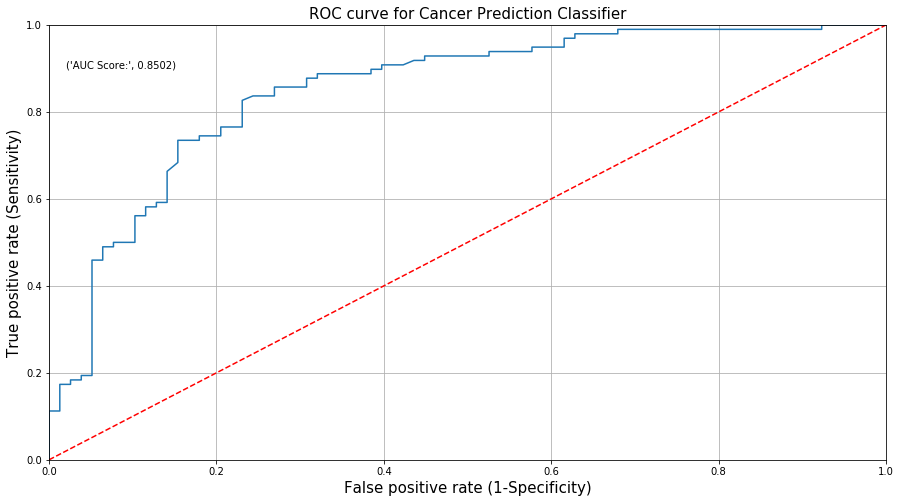

In [294]:
plot_roc1(ada_model)

# Gradient Boost

In [295]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 2, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_trainn, y_trainn)

GradientBoostingClassifier(max_depth=2, n_estimators=150, random_state=10)

In [296]:
test_pred9 = gboost_model.predict(X_testn)

In [297]:
print(classification_report(y_testn,test_pred9))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        78
           1       0.81      0.78      0.79        98

    accuracy                           0.77       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.77      0.77      0.77       176



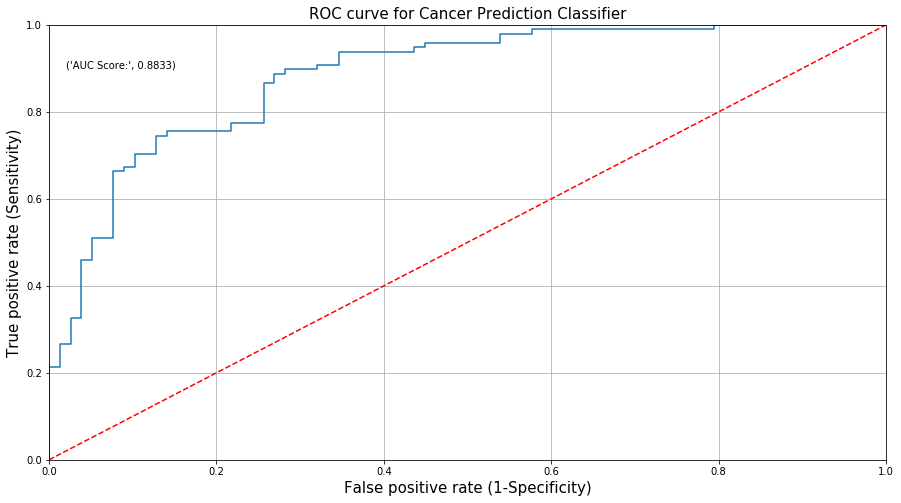

In [298]:
plot_roc1(gboost_model)

# XGBoost

In [299]:
xgb_model = XGBClassifier(max_depth = 4, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_trainn, y_trainn)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [300]:
test_pred10 = xgb_model.predict(X_testn)

In [301]:
print(classification_report(y_testn,test_pred10))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        78
           1       0.81      0.82      0.81        98

    accuracy                           0.79       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.79      0.79       176



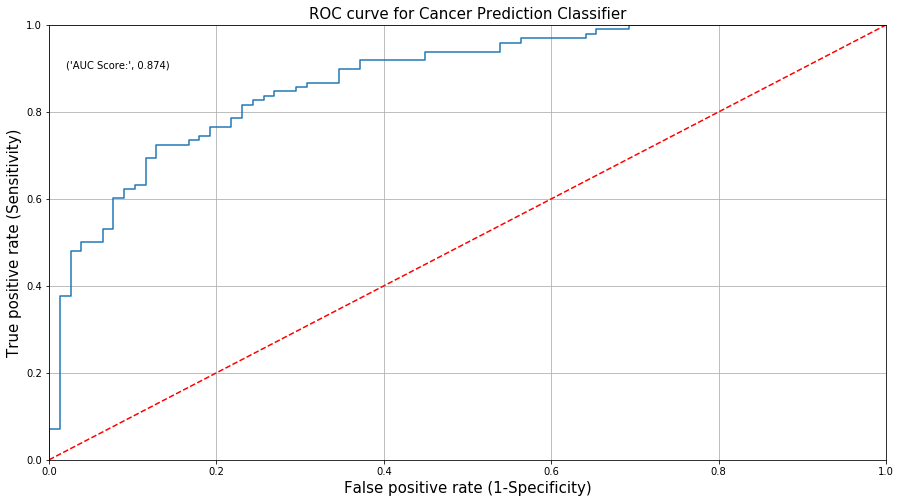

In [302]:
plot_roc1(xgb_model)

In [303]:
# Using GridSearchCV
# Tuning paramters using GridSearchCV
tuning_parameters = {'learning_rate': [0.5],
                     'max_depth': range(2,5),
                     'gamma': [4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_trainn, y_trainn)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.5, 'max_depth': 4} 



In [304]:
test_pred11 = xgb_grid.predict(X_testn)

In [305]:
print(classification_report(y_testn,test_pred11))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        78
           1       0.78      0.78      0.78        98

    accuracy                           0.76       176
   macro avg       0.75      0.75      0.75       176
weighted avg       0.76      0.76      0.76       176



In [306]:
confusion_matrix(y_testn,test_pred11)

array([[57, 21],
       [22, 76]], dtype=int64)

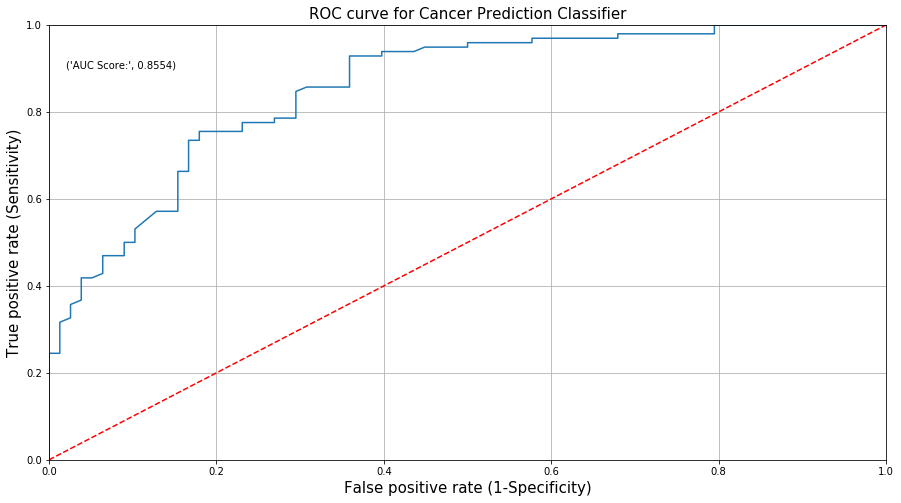

In [307]:
plot_roc1(xgb_grid)

# Stacking

In [308]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'sqrt', 
                                                     max_leaf_nodes = 2, min_samples_leaf = 2, 
                                                     min_samples_split = 2, n_estimators = 30)),
                 ('KNN_model', KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1)),
                 ('XGBoost_model', XGBClassifier(gamma = 4, learning_rate = 0.5, max_depth = 4) )]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = RandomForestClassifier())

# fit the model on train dataset
stack_model.fit(X_trainn, y_trainn)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=2,
                                                       min_samples_leaf=2,
                                                       n_estimators=30)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=1)),
                               ('XGBoost_model',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, ga...
                                              interaction_cons

In [309]:
test_pred12 = stack_model.predict(X_testn)

In [310]:
print(classification_report(y_testn,test_pred12))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75        78
           1       0.81      0.77      0.79        98

    accuracy                           0.77       176
   macro avg       0.76      0.77      0.77       176
weighted avg       0.77      0.77      0.77       176

